In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### load data

In [2]:
cpu_test = np.load('cpu_test.npy')
cpu_test.shape
# normalization: usage mean, usage std, ghz mean, ghz std, idle mean idle std

(200, 6)

In [3]:
x_inp = cpu_test
y = cpu_test[:, 1].reshape(-1, 1)
y.shape

(200, 1)

In [4]:
inds = np.arange(200)
x_inds = np.array([inds[i:i+10] for i in range(180)])
y_inds = np.array([inds[i+10:i+20] for i in range(180)])

In [5]:
y_inds

array([[ 10,  11,  12, ...,  17,  18,  19],
       [ 11,  12,  13, ...,  18,  19,  20],
       [ 12,  13,  14, ...,  19,  20,  21],
       ..., 
       [187, 188, 189, ..., 194, 195, 196],
       [188, 189, 190, ..., 195, 196, 197],
       [189, 190, 191, ..., 196, 197, 198]])

In [6]:
k = 0
def next_batch(batch_size, k):
    if k >= 170:
        k = 0
    x_batch = x_inp[x_inds[k:k+batch_size]]
    y_batch = y[y_inds[k:k+batch_size]]
    k += batch_size
    
    return x_batch, y_batch, k

In [7]:
x_batch, y_batch, k = next_batch(10, k)
x_batch, y_batch, k

(array([[[ 0.09360996,  0.05388845,  0.25279705,  0.53125915,  0.25277938,
           0.01351733],
         [ 0.12644566,  0.03265302,  0.42883444,  0.59814845,  0.29856708,
           0.03927302],
         [ 0.88569816,  0.73399956,  0.46877213,  0.55780382,  0.05546405,
           0.13529379],
         [ 0.04857528,  0.09045046,  0.33111457,  0.35146809,  0.29387301,
           0.01749417],
         [ 0.14816166,  0.10512534,  0.48803286,  0.681614  ,  0.2486206 ,
           0.02430442],
         [ 0.18400467,  0.09661348,  0.22603031,  0.24771356,  0.2932142 ,
           0.05534762],
         [ 0.04563728,  0.11198681,  0.16428268,  0.21026351,  0.30482583,
           0.02682642],
         [ 0.04939712,  0.07167343,  0.37969126,  0.63478452,  0.28259079,
           0.01128418],
         [ 0.08192728,  0.04908888,  0.4408724 ,  0.57170161,  0.28287902,
           0.01111411],
         [ 0.10358105,  0.01365675,  0.59934853,  0.76780693,  0.27686733,
           0.        ]],
 
       

### The LSTM

In [8]:
def _weight(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def _bias(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [9]:
enc_inp = [tf.placeholder(tf.float32, shape=[None, 6], name='enc_inp') for i in range(10)]
target = [tf.placeholder(tf.float32, shape=[None, 1], name='dec_out') for i in range(10)]
dec_inp = [tf.zeros_like(target[0], dtype=np.float32, name="GO")]+target[0:-1]
    
w_enc = _weight([6, 32])
b_enc = _bias([32])
enc_inp_ = [tf.nn.dropout(tf.nn.relu(tf.matmul(enc_inp[i], w_enc)+b_enc), keep_prob=.8) for i in range(10)]

In [10]:
enc_inp_

[<tf.Tensor 'dropout/mul:0' shape=(?, 32) dtype=float32>,
 <tf.Tensor 'dropout_1/mul:0' shape=(?, 32) dtype=float32>,
 <tf.Tensor 'dropout_2/mul:0' shape=(?, 32) dtype=float32>,
 <tf.Tensor 'dropout_3/mul:0' shape=(?, 32) dtype=float32>,
 <tf.Tensor 'dropout_4/mul:0' shape=(?, 32) dtype=float32>,
 <tf.Tensor 'dropout_5/mul:0' shape=(?, 32) dtype=float32>,
 <tf.Tensor 'dropout_6/mul:0' shape=(?, 32) dtype=float32>,
 <tf.Tensor 'dropout_7/mul:0' shape=(?, 32) dtype=float32>,
 <tf.Tensor 'dropout_8/mul:0' shape=(?, 32) dtype=float32>,
 <tf.Tensor 'dropout_9/mul:0' shape=(?, 32) dtype=float32>]

In [11]:
dec_inp

[<tf.Tensor 'GO:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_1:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_2:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_3:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_4:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_5:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_6:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_7:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_8:0' shape=(?, 1) dtype=float32>]

In [12]:
target

[<tf.Tensor 'dec_out:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_1:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_2:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_3:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_4:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_5:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_6:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_7:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_8:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dec_out_9:0' shape=(?, 1) dtype=float32>]

In [13]:
n_hiddens = 2
cells = [tf.contrib.rnn.BasicLSTMCell(n_hiddens, forget_bias=1.0) for i in range(2)]
cell = tf.contrib.rnn.MultiRNNCell(cells)

In [14]:
dec_outputs, dec_memory = tf.contrib.legacy_seq2seq.basic_rnn_seq2seq(
        enc_inp_, 
        dec_inp, 
        cell
    )

In [15]:
w_out = _weight([2, 1])
b_out = _bias([1])
output_scale_factor = tf.Variable(1.0, name="Output_ScaleFactor")
    
results = [output_scale_factor*(tf.matmul(i, w_out) + b_out) for i in dec_outputs]

# reshaped_outputs = [output_scale_factor*(tf.matmul(i, w_out) + b_out) for i in dec_outputs]

In [16]:
# Optmizer: 
l_r = 0.007  # Small lr helps not to diverge during training. 
lr_decay = 0.92  # default: 0.9 . Simulated annealing.
momentum = 0.5  # default: 0.0 . Momentum technique in weights update

output_loss = 0
for _y, _Y in zip(results, target):
    output_loss += tf.reduce_mean(tf.nn.l2_loss(_y - _Y))
# L2 regularization (to avoid overfitting and to have a  better generalization capacity)
# reg_loss = 0
# for tf_var in tf.trainable_variables():
#     if not ("Bias" in tf_var.name or "Output_" in tf_var.name):
#         reg_loss += tf.reduce_mean(tf.nn.l2_loss(tf_var))

op = tf.train.RMSPropOptimizer(l_r, decay=lr_decay, momentum=momentum).minimize(output_loss)

In [26]:
epoch = 1000
batch_size = 10
init = tf.global_variables_initializer()
loss_ = list()
with tf.Session() as sess:
    sess.run(init)
    for epo in range(epoch):
        for i in range(17):
            x_batch, y_batch, k = next_batch(batch_size, k)
            feed_dict = {enc_inp[t]: x_batch[t] for t in range(len(enc_inp))}
            feed_dict.update({target[t]: y_batch[t] for t in range(len(target))})
            _ = sess.run([op], feed_dict=feed_dict)
        if (epo+1)%10 == 0:
            loss = sess.run([output_loss], feed_dict=feed_dict)
            loss_.append(loss)
            print('Epoch:', epo+1, 
                  'Loss:', loss)
    
    feed_dict = {enc_inp[t]: x_inp[180:190][t].reshape([-1, 6]) for t in range(len(enc_inp))}
    feed_dict.update({target[t]: y[190:][t].reshape([-1, 1]) for t in range(len(target))})
    y_pred1 = sess.run(results, feed_dict=feed_dict)
    y_pred1 = np.array(y_pred1).reshape([-1, 1])
    
    feed_dict = {enc_inp[t]: x_inp[115:125][t].reshape([-1, 6]) for t in range(len(enc_inp))}
    feed_dict.update({target[t]: y[125:][t].reshape([-1, 1]) for t in range(len(target))})
    y_pred2 = sess.run(results, feed_dict=feed_dict)
    y_pred2 = np.array(y_pred2).reshape([-1, 1])    
    
    feed_dict = {enc_inp[t]: x_inp[112:122][t].reshape([-1, 6]) for t in range(len(enc_inp))}
    feed_dict.update({target[t]: y[122:][t].reshape([-1, 1]) for t in range(len(target))})
    y_pred3 = sess.run(results, feed_dict=feed_dict)
    y_pred3 = np.array(y_pred3).reshape([-1, 1])
    
    print('Done.')

Epoch: 10 Loss: [1.5738423]
Epoch: 20 Loss: [0.57016975]
Epoch: 30 Loss: [0.48973525]
Epoch: 40 Loss: [0.41554981]
Epoch: 50 Loss: [0.30175847]
Epoch: 60 Loss: [0.21828681]
Epoch: 70 Loss: [0.26752064]
Epoch: 80 Loss: [0.19035102]
Epoch: 90 Loss: [0.14012769]
Epoch: 100 Loss: [0.17820312]
Epoch: 110 Loss: [0.1412264]
Epoch: 120 Loss: [0.10543123]
Epoch: 130 Loss: [0.11671318]
Epoch: 140 Loss: [0.076797828]
Epoch: 150 Loss: [0.089979157]
Epoch: 160 Loss: [0.13663585]
Epoch: 170 Loss: [0.12995081]
Epoch: 180 Loss: [0.15272647]
Epoch: 190 Loss: [0.10869227]
Epoch: 200 Loss: [0.11066042]
Epoch: 210 Loss: [0.093652591]
Epoch: 220 Loss: [0.085491523]
Epoch: 230 Loss: [0.0878231]
Epoch: 240 Loss: [0.092125624]
Epoch: 250 Loss: [0.10039236]
Epoch: 260 Loss: [0.0777798]
Epoch: 270 Loss: [0.1527296]
Epoch: 280 Loss: [0.11035995]
Epoch: 290 Loss: [0.081989959]
Epoch: 300 Loss: [0.077778503]
Epoch: 310 Loss: [0.086896092]
Epoch: 320 Loss: [0.087431327]
Epoch: 330 Loss: [0.093500845]
Epoch: 340 Los

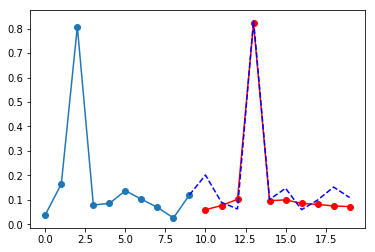

In [24]:
plt.plot(np.arange(10), x_inp[180:190, 1], '-o')
plt.plot(np.arange(20)[10:], y_pred1, '-ro') # pred 
plt.plot(np.arange(20)[9:], x_inp[189:, 1], '--b') # real 
plt.show()

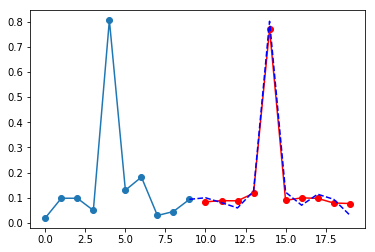

In [22]:
plt.plot(np.arange(10), x_inp[115:125, 1], '-o')
plt.plot(np.arange(20)[10:], y_pred2, '-ro') # pred 
plt.plot(np.arange(20)[9:], x_inp[124:135, 1], '--b') # real 
plt.show()

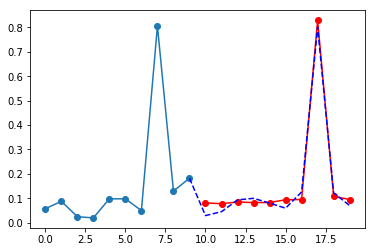

In [23]:
plt.plot(np.arange(10), x_inp[112:122, 1], '-o')
plt.plot(np.arange(20)[10:], y_pred3, '-ro') # pred 
plt.plot(np.arange(20)[9:], x_inp[121:132, 1], '--b') # real 
plt.show()

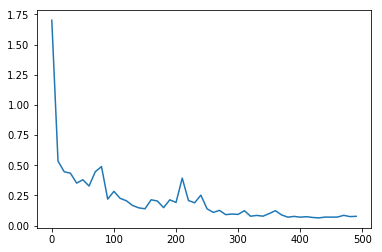

In [25]:
plt.plot(np.arange(len(loss_))*10, loss_)
plt.show()

In [58]:
y_pred1

array([[ 0.29015023],
       [ 0.18072164],
       [-0.33479571],
       [-0.77907753],
       [-0.91983753]], dtype=float32)

In [22]:
y[y_inds[0]]

array([[ 0.59847214],
       [ 0.14112001],
       [-0.35078323],
       [-0.7568025 ],
       [-0.97753012]])

In [32]:
x_inp[x_inds[0], 0]

array([ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743])

In [37]:
y

array([[ 0.        ],
       [ 0.47942554],
       [ 0.84147098],
       [ 0.99749499],
       [ 0.90929743],
       [ 0.59847214],
       [ 0.14112001],
       [-0.35078323],
       [-0.7568025 ],
       [-0.97753012],
       [-0.95892427],
       [-0.70554033],
       [-0.2794155 ],
       [ 0.21511999],
       [ 0.6569866 ],
       [ 0.93799998],
       [ 0.98935825],
       [ 0.79848711],
       [ 0.41211849],
       [-0.07515112]])

In [3]:
!nvidia-smi

Tue Nov 28 18:48:36 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 375.66                 Driver Version: 375.66                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106...  Off  | 0000:01:00.0      On |                  N/A |
|  0%   48C    P2    27W / 120W |   5938MiB /  6071MiB |     26%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  